# Artificial Neural Networks for Regression

_By: Ling Li Ya, Liana_

## Pre-training Preparation

### Installing Dependencies

In [6]:
!pip install tensorflow
!pip install keras

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

2021-11-30 15:18:22.641780: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-30 15:18:22.641816: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Loading Data

In [2]:
# Cleaned dataset with no outliers
X_train_no = pd.read_csv('../dataset/no_outliers/X_train.csv')
X_test_no = pd.read_csv('../dataset/no_outliers/X_test.csv')
y_train_no = pd.read_csv('../dataset/no_outliers/y_train.csv')
y_test_no = pd.read_csv('../dataset/no_outliers/y_test.csv')

# Uncleaned original data
X_train_with = pd.read_csv('../dataset/with_outliers/X_train.csv')
X_test_with = pd.read_csv('../dataset/with_outliers/X_test.csv')
y_train_with = pd.read_csv('../dataset/with_outliers/y_train.csv')
y_test_with = pd.read_csv('../dataset/with_outliers/y_test.csv')

In [3]:
def standardise_data(X_train, y_train, X_test, y_test):
    X_scaler = StandardScaler()
    y_scaler = StandardScaler()

    # Scale data to standardise data values
    X_train_trans = X_scaler.fit_transform(X_train)
    y_train_trans = y_scaler.fit_transform(y_train)
    X_test_trans = X_scaler.transform(X_test)
    y_test_trans = y_scaler.transform(y_test)
    
    print(X_train_trans.shape, y_train_trans.shape, X_test_trans.shape, y_test_trans.shape)

    return X_scaler, y_scaler, X_train_trans, y_train_trans, X_test_trans, y_test_trans

X_scaler_no, y_scaler_no, X_train_no_trans, y_train_no_trans, X_test_no_trans, y_test_no_trans = standardise_data(X_train_no, y_train_no, X_test_no, y_test_no)

(578, 9) (578, 1) (145, 9) (145, 1)


## Training

Using a layer with 5 neurons, with 9 input dimensions of normal weight, using relu activation function. Batch size is 20 and training epochs are 50.

In [4]:
def create_seq_model():
    model = Sequential()

    # Defining the input layer and first hidden layer
    model.add(Dense(units=5, input_dim=9, kernel_initializer='normal', activation='relu'))

    # Defining the second layer of the model
    model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

    # The output neuron is a single fully connected node as only a single number is predicted
    model.add(Dense(1, kernel_initializer='normal'))

    # Compiling the model
    model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape'])

    return model

def train_model(model, X_train, y_train):
    # Fitting the ANN to the training data
    model.fit(X_train, y_train, batch_size=20, epochs=50, verbose=1)

    return model

model_no = create_seq_model()
model_no = train_model(model_no, X_train_no_trans, y_train_no_trans)

2021-11-30 15:18:26.017236: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (100)
2021-11-30 15:18:26.017323: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Liana-ASUS): /proc/driver/nvidia/version does not exist
2021-11-30 15:18:26.018966: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
29/29 [==============================] - 0s 1ms/step - loss: 0.9949 - mse: 0.9949 - mae: 0.8119 - mape: 100.1656
Epoch 2/50
29/29 [==============================] - 0s 1ms/step - loss: 0.9777 - mse: 0.9777 - mae: 0.8048 - mape: 99.4763
Epoch 3/50
29/29 [==============================] - 0s 895us/step - loss: 0.9276 - mse: 0.9276 - mae: 0.7836 - mape: 98.7632
Epoch 4/50
29/29 [==============================] - 0s 1ms/step - loss: 0.8115 - mse: 0.8115 - mae: 0.7332 - mape: 99.7881
Epoch 5/50
29/29 [==============================] - 0s 1ms/step - loss: 0.6298 - mse: 0.6298 - mae: 0.6446 - mape: 114.2102
Epoch 6/50
29/29 [==============================] - 0s 1ms/step - loss: 0.4437 - mse: 0.4437 - mae: 0.5400 - mape: 141.2472
Epoch 7/50
29/29 [==============================] - 0s 1ms/step - loss: 0.3179 - mse: 0.3179 - mae: 0.4514 - mape: 166.0522
Epoch 8/50
29/29 [==============================] - 0s 4ms/step - loss: 0.2502 - mse: 0.2502 - mae: 0.3902 - mape: 178.6782
Epoch 9/5

## Hyperparameter Tuning

To find the best accuracy with the minimum number of layers/neurons.

### Grid Search

MAPE is used. MAPE is Mean Absolute Percent Error. This is defined as the Average Absolute Error divided by the Average of the Actual Quantity. A more elegant way to compute this would be to divide the Sum of the Absolute Error by the Sum of the Actual Quantity.

MAPE = (Sum of Abs. Error) / (Sum of Actuals)

In [5]:
# Find the best parameters for ANN
def find_best_params(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list = [5, 10, 15, 20]
    epoch_list = [5, 10, 50, 100]

    results = pd.DataFrame(columns=['trial_num', 'param', 'accuracy'])
    
    # Initialising the trials
    trial_number = 0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            trial_number += 1
            # Create ANN model
            model = Sequential()

            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # Output neuron
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # Printing the results of the current iteration
            print(trial_number, 'Parameters:','batch_size:', batch_size_trial,'-', 'Epochs:',epochs_trial, 'Accuracy:', 100 - MAPE)
            
            results = results.append(pd.DataFrame(data=[[trial_number, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]], columns=['trial_num', 'param', 'accuracy'] ))

    return(results)

results_no = find_best_params(X_train_no_trans, y_train_no_trans, X_test_no_trans, y_test_no_trans)

1 Parameters: batch_size: 5 - Epochs: 5 Accuracy: 74.28418085901994
2 Parameters: batch_size: 5 - Epochs: 10 Accuracy: 71.03884688653119
3 Parameters: batch_size: 5 - Epochs: 50 Accuracy: 113.93394228457329
4 Parameters: batch_size: 5 - Epochs: 100 Accuracy: 81.20037983408014
5 Parameters: batch_size: 10 - Epochs: 5 Accuracy: 125.70143323885307
6 Parameters: batch_size: 10 - Epochs: 10 Accuracy: 96.03448324025447
7 Parameters: batch_size: 10 - Epochs: 50 Accuracy: 45.54883816734523
8 Parameters: batch_size: 10 - Epochs: 100 Accuracy: 88.4286373927283
9 Parameters: batch_size: 15 - Epochs: 5 Accuracy: 117.19684461492253
10 Parameters: batch_size: 15 - Epochs: 10 Accuracy: 147.26572575225873
11 Parameters: batch_size: 15 - Epochs: 50 Accuracy: 77.08923353528348
12 Parameters: batch_size: 15 - Epochs: 100 Accuracy: 98.12918618945744
13 Parameters: batch_size: 20 - Epochs: 5 Accuracy: 102.89438066256766
14 Parameters: batch_size: 20 - Epochs: 10 Accuracy: 132.0017748557585
15 Parameters: b

### Plotting Results

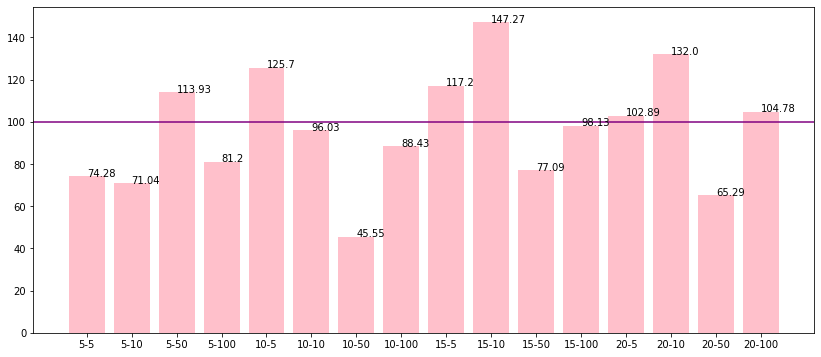

In [6]:
def plot_bar_chart(results):
    plt.figure(figsize=(14,6))
    plt.bar(results['param'], height=results['accuracy'], color='pink')
    plt.axhline(y=100, color='purple', linestyle='-')
    for a, b in zip([x for x in range(len(results['accuracy']))], round(results['accuracy'], 2)):
        plt.text(a, b, str(b), color='black')
    plt.show()

plot_bar_chart(results_no)

From the graph above, it can be known that the best hyperparameters are `batch_size` = 15 and `epochs` = 10.

In [15]:
# Fine-tune hyperparameters
def fine_tune_model(model, batch_size, epochs, X_scaler, y_scaler, X_train_trans, y_train_trans, X_test_trans, y_test_trans, columns):
    model.fit(X_train_trans, y_train_trans, batch_size=batch_size, epochs=epochs, verbose=1)

    pred = model.predict(X_test_trans)

    # Scale predictions
    pred = y_scaler.inverse_transform(pred)

    # Scale back to original
    y_test = y_scaler.inverse_transform(y_test_trans)
    X_test = X_scaler.inverse_transform(X_test_trans)

    test_data = pd.DataFrame(data=X_test, columns=columns)
    test_data['count'] = y_test
    test_data['pred_count'] = pred
    print(test_data.head())

    return test_data

test_data_no = fine_tune_model(
        model=model_no,
        batch_size=15,
        epochs=10,
        X_scaler=X_scaler_no,
        y_scaler=y_scaler_no,
        X_train_trans=X_train_no_trans,
        y_train_trans=y_train_no_trans,
        X_test_trans=X_test_no_trans,
        y_test_trans=y_test_no_trans,
        columns=X_test_no.columns
    )

Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1205 - mse: 0.1205 - mae: 0.2577 - mape: 115.2105
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1200 - mse: 0.1200 - mae: 0.2597 - mape: 113.0108
Epoch 3/10
39/39 [==============================] - 0s 3ms/step - loss: 0.1207 - mse: 0.1207 - mae: 0.2566 - mape: 118.3372
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1212 - mse: 0.1212 - mae: 0.2577 - mape: 111.9661
Epoch 5/10
39/39 [==============================] - 0s 1ms/step - loss: 0.1197 - mse: 0.1197 - mae: 0.2567 - mape: 115.6216
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1198 - mse: 0.1198 - mae: 0.2567 - mape: 117.7005
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1205 - mse: 0.1205 - mae: 0.2581 - mape: 112.7276
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.1202 - mae: 0.2576 - mape: 116.0737
Epoch 9/

In [16]:
def evaluate_model(test_data):
# Mean Absolute Percentage Error
    APE = 100 * (abs(test_data['count'] - test_data['pred_count']) / test_data['count'])
    test_data['APE'] = APE

    print("Accuracy: ", 100 - np.mean(APE))

evaluate_model(test_data_no)

Accuracy:  83.34118385565387
   season  year  month  holiday  weekday  weather  temperature  humidity  \
0     3.0   1.0    7.0      0.0      0.0      1.0     0.721667  0.623750   
1     2.0   1.0    5.0      0.0      4.0      1.0     0.593333  0.520000   
2     3.0   1.0    8.0      0.0      5.0      2.0     0.765833  0.642500   
3     2.0   1.0    4.0      0.0      5.0      1.0     0.403333  0.377083   
4     4.0   1.0   11.0      0.0      1.0      1.0     0.319167  0.494167   

   windspeed   count   pred_count        APE  
0   0.170396  6597.0  6816.720703   3.330615  
1   0.229475  7384.0  7121.024414   3.561425  
2   0.215792  7175.0  6939.851074   3.277337  
3   0.300388  6460.0  5602.129883  13.279723  
4   0.236325  5259.0  5178.487793   1.530941  
MSE:  521522.03


In [17]:
model_no.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 50        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________


## Using Data With Outliers

In [18]:
X_scaler_with, y_scaler_with, X_train_with_trans, y_train_with_trans, X_test_with_trans, y_test_with_trans = standardise_data(X_train_with, y_train_with, X_test_with, y_test_with)

(584, 9) (584, 1) (147, 9) (147, 1)


In [19]:
model_with = create_seq_model()
model_with = train_model(model_with, X_train_with_trans, y_train_with_trans)

Epoch 1/50
30/30 [==============================] - 0s 1ms/step - loss: 0.9991 - mse: 0.9991 - mae: 0.8156 - mape: 100.3959
Epoch 2/50
30/30 [==============================] - 0s 918us/step - loss: 0.9907 - mse: 0.9907 - mae: 0.8118 - mape: 99.5457
Epoch 3/50
30/30 [==============================] - 0s 877us/step - loss: 0.9492 - mse: 0.9492 - mae: 0.7942 - mape: 98.0679
Epoch 4/50
30/30 [==============================] - 0s 1ms/step - loss: 0.8350 - mse: 0.8350 - mae: 0.7428 - mape: 102.8161
Epoch 5/50
30/30 [==============================] - 0s 930us/step - loss: 0.6550 - mse: 0.6550 - mae: 0.6554 - mape: 125.6638
Epoch 6/50
30/30 [==============================] - 0s 915us/step - loss: 0.4676 - mse: 0.4676 - mae: 0.5506 - mape: 144.3644
Epoch 7/50
30/30 [==============================] - 0s 826us/step - loss: 0.3323 - mse: 0.3323 - mae: 0.4623 - mape: 190.2875
Epoch 8/50
30/30 [==============================] - 0s 965us/step - loss: 0.2600 - mse: 0.2600 - mae: 0.4017 - mape: 205.192

The same `batch_size` and `epochs` are used for accuracy comparison.

In [23]:
test_data_with = fine_tune_model(
    model=model_with,
    batch_size=15,
    epochs=10,
    X_scaler=X_scaler_with,
    y_scaler=y_scaler_with,
    X_train_trans=X_train_with_trans,
    y_train_trans=y_train_with_trans,
    X_test_trans=X_test_with_trans,
    y_test_trans=y_test_with_trans,
    columns=X_test_with.columns,
)

Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1360 - mse: 0.1360 - mae: 0.2724 - mape: 111.5409
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1375 - mse: 0.1375 - mae: 0.2753 - mape: 112.1520
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1360 - mse: 0.1360 - mae: 0.2744 - mape: 109.0865
Epoch 4/10
39/39 [==============================] - 0s 1ms/step - loss: 0.1368 - mse: 0.1368 - mae: 0.2697 - mape: 109.1752
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1358 - mse: 0.1358 - mae: 0.2738 - mape: 115.0224
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1355 - mse: 0.1355 - mae: 0.2727 - mape: 112.7888
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1348 - mse: 0.1348 - mae: 0.2716 - mape: 109.6180
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1344 - mse: 0.1344 - mae: 0.2724 - mape: 112.9226
Epoch 9/

In [24]:
evaluate_model(test_data=test_data_with)

Accuracy:  80.26504659087091
   season  year  month       holiday  weekday  weather  temperature  humidity  \
0     3.0   0.0    7.0 -3.469447e-18      6.0      1.0     0.686667  0.585000   
1     3.0   0.0    7.0 -3.469447e-18      4.0      1.0     0.750000  0.651250   
2     1.0   0.0    1.0 -3.469447e-18      6.0      2.0     0.233333  0.498750   
3     1.0   0.0    2.0 -3.469447e-18      2.0      2.0     0.192174  0.829565   
4     1.0   1.0    1.0 -3.469447e-18      4.0      2.0     0.341667  0.769583   

   windspeed   count   pred_count        APE  
0   0.208342  5923.0  4923.138672  16.880995  
1   0.159200  4592.0  4610.029297   0.392624  
2   0.157963  1248.0  1579.698853  26.578434  
3   0.053213  1360.0  1348.216675   0.866421  
4   0.073396  4075.0  3728.545410   8.501953  
MSE:  592025.94


In [25]:
model_with.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 5)                 50        
                                                                 
 dense_55 (Dense)            (None, 5)                 30        
                                                                 
 dense_56 (Dense)            (None, 1)                 6         
                                                                 
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________


In conclusion, using cleaned data without outliers would give a higher accuracy than using data with outliers.